Names of Members of the group

1. Adenike Bello
2. Maryam Habib
3. Sharon Alawode
4. Betty Igbukan
5. Faith Arayi
6. Khadijah Adebayo
7. Yvette Wambi


# Importing all Libaries and mounting our drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Loading and Cleaning of the Dataset

In [ ]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

This shows that there are 1337 rows and 10 columns in this dataset.

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It shows here that there are no null values in the dataset.

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

This show that there is a duplicate in the dataset.

In [ ]:
df.drop_duplicates(keep="first", inplace = True)

We drop the duplicate

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


**The describe function for statistical analysis shows that the highest age is 64 years and the most charged on insurance is approximately 63,770. In this data set, 5 is the highest number of children bored by the respondents.**

In [ ]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
944,62,male,39.930,0,no,southeast,12982.87470
901,60,male,40.920,0,yes,southeast,48673.55880
527,51,female,25.800,1,no,southwest,9861.02500
676,55,female,40.810,3,no,southeast,12485.80090
788,29,male,22.515,3,no,northeast,5209.57885


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
region = pd.DataFrame(df["region"].value_counts())
region

,region
southeast,364
southwest,325
northwest,324
northeast,324


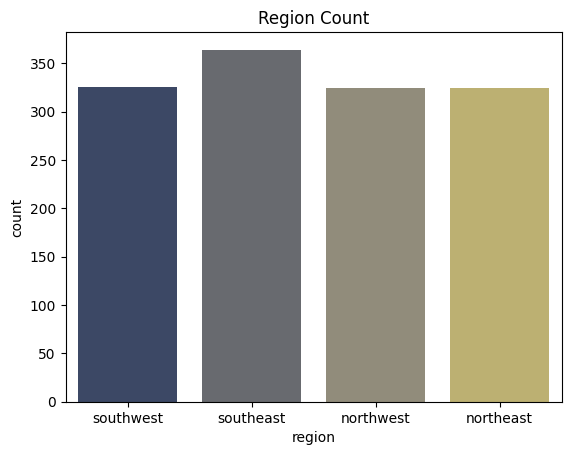

In [ ]:
# Bar chart showing the region count
sns.countplot(x="region",data=df, hue = "region", palette = "cividis")
plt.title("Region Count")
plt.show()

This chart shows that the the beneficiary's residential area with the most insurance charged is Southeast.

In [ ]:
sex = pd.DataFrame(df["sex"].value_counts())
sex

,sex
male,675
female,662


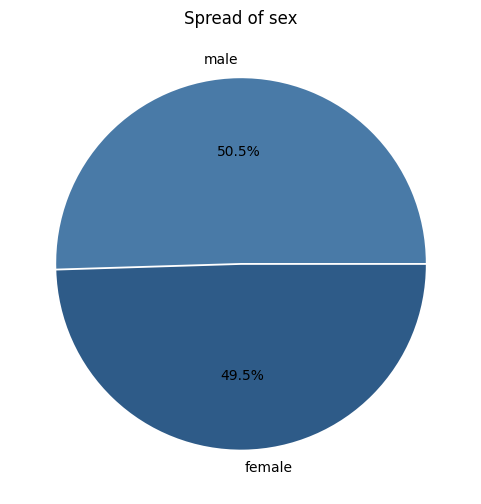

In [ ]:
# Pie plot showing the composition of sex in the insurance data set
colors = ["#497AA7", "#2E5B88"]
plt.figure(figsize =(6,6))
plt.pie(x=df["sex"].value_counts(), labels = ["male","female"], autopct="%1.1f%%", explode = (0,0.01), colors = colors)
plt.title("Spread of sex")
plt.show()

This Piechart demonstrates that Male charged by the health insurance by 50.5% for their medical cost than the female.

In [ ]:
children = pd.DataFrame(df["children"].value_counts())
children

,children
0,573
1,324
2,240
3,157
4,25
5,18


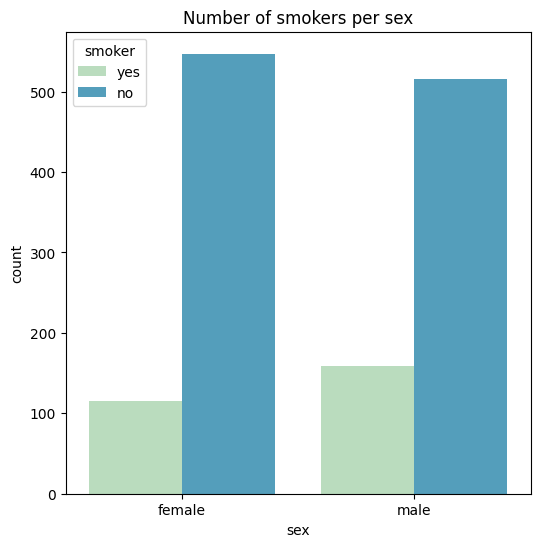

In [ ]:
# Plotting the number of smokers based on sex
plt.figure(figsize =(6,6))
sns.countplot(x = "sex", data = df, hue ="smoker",palette = "GnBu")
plt.title("Number of smokers per sex")
plt.show()

This chart demonstrates that out of the beneficiaries, there are more male smokers than female and are more female nonsmokers than male.

# **LABEL ENCODER AND LINEAR REGRESSION**

In [ ]:
# Assigning label encoder to each column to be assinged numerical variable
le_smoker = LabelEncoder()
le_sex = LabelEncoder()
le_region = LabelEncoder()

In [ ]:
# using label encoder to assign  numbers to the categorical variables
df["smokerr"] = le_smoker.fit_transform(df["smoker"])
df["sexx"] = le_smoker.fit_transform(df["sex"])
df["regionn"] = le_smoker.fit_transform(df["region"])
df.sample(15)

,age,sex,bmi,children,smoker,region,charges,smokerr,sexx,regionn
811,33,female,42.940,3,no,northwest,6360.99360,0,0,1
337,62,male,27.550,1,no,northwest,13937.66650,0,1,1
1065,42,female,25.300,1,no,southwest,7045.49900,0,0,3
565,19,female,30.495,0,no,northwest,2128.43105,0,0,1
428,21,female,16.815,1,no,northeast,3167.45585,0,0,0
948,42,male,31.255,0,no,northwest,6358.77645,0,1,1
1285,47,female,24.320,0,no,northeast,8534.67180,0,0,0
516,20,male,35.310,1,no,southeast,27724.28875,0,1,2
195,19,male,30.590,0,no,northwest,1639.56310,0,1,1
1255,42,female,37.900,0,no,southwest,6474.01300,0,0,3


In [ ]:
# Dropping the columns that were converted to numbers
new_df = df.drop(["sex", "smoker", "region"], axis = "columns")
new_df

,age,bmi,children,charges,smokerr,sexx,regionn
0,19,27.900,0,16884.92400,1,0,3
1,18,33.770,1,1725.55230,0,1,2
2,28,33.000,3,4449.46200,0,1,2
3,33,22.705,0,21984.47061,0,1,1
4,32,28.880,0,3866.85520,0,1,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [ ]:
# Drop the dependent variable leaving the independent variable
y = new_df.drop(["charges"], axis = "columns")
y

,age,bmi,children,smokerr,sexx,regionn
0,19,27.900,0,1,0,3
1,18,33.770,1,0,1,2
2,28,33.000,3,0,1,2
3,33,22.705,0,0,1,1
4,32,28.880,0,0,1,1
...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,0,2
1336,21,25.800,0,0,0,3


In [ ]:
# Calling the dependent variable
x = df["charges"]
x

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [ ]:
# Calling the machine learning model to be used
model = LinearRegression()
model

LinearRegression()

In [ ]:
# Model fitting
reg = model.fit(y,x)
reg

LinearRegression()

In [ ]:
x_test, y_test, x_train, y_train = train_test_split(x,y,test_size = 0.2)
x_test, y_test, x_train, y_train

(892     10422.91665
 648      1712.22700
 1196    33307.55080
 1263     7337.74800
 861      7151.09200
            ...     
 6        8240.58960
 1071    13974.45555
 817      3597.59600
 156     21223.67580
 330     48517.56315
 Name: charges, Length: 1069, dtype: float64,
 693      2352.96845
 805      7731.85785
 528      8342.90875
 103     30942.19180
 796      4266.16580
            ...     
 847      2438.05520
 508      3044.21330
 488     48885.13561
 1238     6985.50695
 1240    47269.85400
 Name: charges, Length: 268, dtype: float64,
       age     bmi  children  smokerr  sexx  regionn
 892    54  24.035         0        0     1        0
 648    18  28.500         0        0     1        0
 1196   19  30.020         0        1     0        1
 1263   43  29.900         1        0     0        3
 861    38  28.000         3        0     0        3
 ...   ...     ...       ...      ...   ...      ...
 6      46  33.440         1        0     0        2
 1071   63  31.445     

In [ ]:
model.score(y,x)*100

75.05714331710207

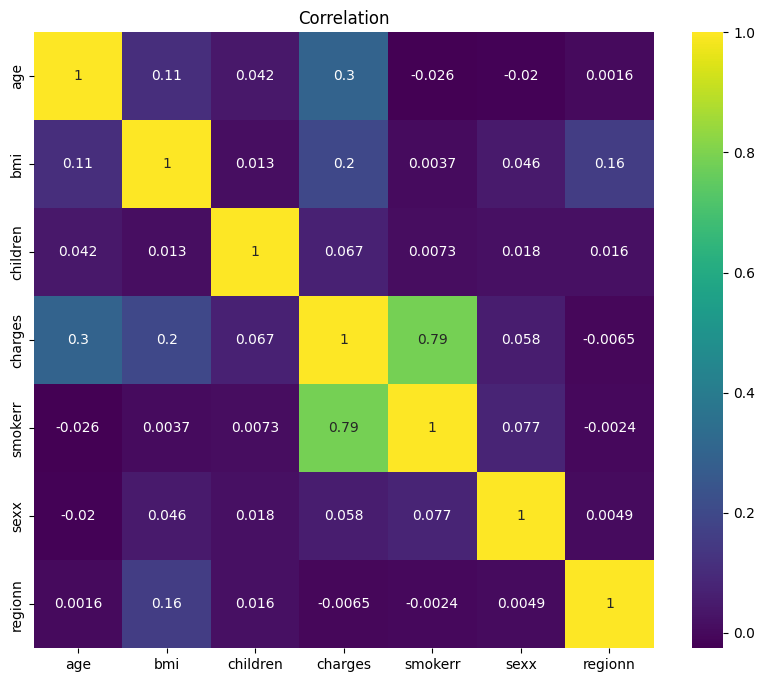

In [ ]:
#visualize the correlation
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = "viridis")
plt.title("Correlation")
plt.show()

In [ ]:
model.predict([[18, 30.0, 0,0,1,1]])

array([2312.66536953])

**The above has predicted the insurance charge for an 18 year old female to be** **2312.67** **from the northwestern region who has a BMI of 30.0, no children.**


In [ ]:
model.predict([[40, 50.0,3,1,0,2]])

array([39653.90623623])

 **The above has predicted the insurance charge for a 40 year old male to be approximately** **39,653.91** **from the southeastern region who has a BMI of 50.0 with 3 children**

In [ ]:
model.predict([[80, 60.0,6,1,1,3]])

array([54220.89565258])

**The above has predicted the insurance charge for an 80 year old female to be approximately 54,221 from the southwestern region who has a BMI of 60.0 with 6 children.**

# **LOGISTICS REGRESSION**

In [ ]:
new_df

,age,bmi,children,charges,smokerr,sexx,regionn
0,19,27.900,0,16884.92400,1,0,3
1,18,33.770,1,1725.55230,0,1,2
2,28,33.000,3,4449.46200,0,1,2
3,33,22.705,0,21984.47061,0,1,1
4,32,28.880,0,3866.85520,0,1,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [ ]:
dep_1 = new_df["smokerr"]
dep_1

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smokerr, Length: 1337, dtype: int64

In [ ]:
Indep_2 = new_df.drop(["smokerr"], axis = "columns")
Indep_2

,age,bmi,children,charges,sexx,regionn
0,19,27.900,0,16884.92400,0,3
1,18,33.770,1,1725.55230,1,2
2,28,33.000,3,4449.46200,1,2
3,33,22.705,0,21984.47061,1,1
4,32,28.880,0,3866.85520,1,1
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,2
1336,21,25.800,0,2007.94500,0,3


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Indep_2, dep_1, test_size = 0.2)
X_train, X_test, y_train, y_test

(      age     bmi  children      charges  sexx  regionn
 977    26  29.150         1   2902.90650     1        2
 850    37  30.780         0  37270.15120     0        0
 1141   41  32.600         3   7954.51700     0        3
 744    50  26.410         0   8827.20990     1        1
 1001   24  32.700         0  34472.84100     1        3
 ...   ...     ...       ...          ...   ...      ...
 478    21  36.850         0   1534.30450     1        2
 957    24  26.790         1  12609.88702     1        1
 739    29  35.500         2  44585.45587     1        3
 727    29  21.755         1  16657.71745     0        0
 523    38  37.730         0   5397.61670     0        2
 
 [1069 rows x 6 columns],
       age     bmi  children      charges  sexx  regionn
 1083   32  31.500         1   4076.49700     1        3
 796    30  44.220         2   4266.16580     1        2
 454    32  46.530         2   4686.38870     1        2
 716    49  22.610         1   9566.99090     0        1
 28

In [ ]:
len(X_test)

268

In [ ]:
len(y_test)

268

In [ ]:
len(X_train)

1069

In [ ]:
len(y_train)

1069

In [ ]:
# Initialize logistic regression model
logreg = LogisticRegression()
logreg

LogisticRegression()

In [ ]:
# fitting the x and y variables to LR model
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predicting the x variables
logreg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0])

In [ ]:
# checking the accuracy of the model
logreg.score(X_test, y_test)

0.9402985074626866

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[213   0]
 [  0  55]]


In [ ]:
logreg.predict([[45,30.0, 4, 35000, 1, 2]])

array([1])

The above has predicted that a 45 year old male, who has BMI of 30.0, with 4 children, and insurance charge of 35000 from the southeastern region is a smoker

In [ ]:
logreg.predict([[20,25.0, 0, 10000, 0, 3]])

array([0])

The above has predicted that a 20 year old female, who has BMI of 25.0, with 0 children, and insurance charge of 35000 from the southwestern region is not a smoker

In [ ]:
logreg.predict([[61,29.0, 3, 16000, 1, 1]])

array([0])

The above has predicted that a 61 year old male, who has BMI of 29.0, with 3 children, and insurance charge of 16000 from the northwestern region is not a smoker

# Decision tree #

In [ ]:
new_df

,age,bmi,children,charges,smokerr,sexx,regionn
0,19,27.900,0,16884.92400,1,0,3
1,18,33.770,1,1725.55230,0,1,2
2,28,33.000,3,4449.46200,0,1,2
3,33,22.705,0,21984.47061,0,1,1
4,32,28.880,0,3866.85520,0,1,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [ ]:
no_smk = new_df.drop(["smokerr"], axis = "columns")
no_smk

,age,bmi,children,charges,sexx,regionn
0,19,27.900,0,16884.92400,0,3
1,18,33.770,1,1725.55230,1,2
2,28,33.000,3,4449.46200,1,2
3,33,22.705,0,21984.47061,1,1
4,32,28.880,0,3866.85520,1,1
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,2
1336,21,25.800,0,2007.94500,0,3


In [ ]:
target = new_df["smokerr"]
target

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smokerr, Length: 1337, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(no_smk, target, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(      age     bmi  children      charges  sexx  regionn
 896    43  20.045         2  19798.05455     0        0
 194    18  34.430         0   1137.46970     1        2
 240    23  36.670         2  38511.62830     0        0
 1257   54  27.645         1  11305.93455     0        1
 575    58  27.170         0  12222.89830     0        1
 ...   ...     ...       ...          ...   ...      ...
 764    45  25.175         2   9095.06825     0        0
 836    36  31.500         0   4402.23300     1        3
 1217   29  37.290         2   4058.11610     1        2
 559    19  35.530         0   1646.42970     1        1
 685    53  26.410         2  11244.37690     1        0
 
 [1069 rows x 6 columns],
       age     bmi  children      charges  sexx  regionn
 1248   18  39.820         0   1633.96180     0        2
 610    47  29.370         1   8547.69130     0        2
 393    49  31.350         1   9290.13950     1        0
 503    19  30.250         0  32548.34050     1        2
 19

In [ ]:
treemodel = tree.DecisionTreeClassifier()
treemodel

DecisionTreeClassifier()

In [ ]:
# Fit the model
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = treemodel.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0])

In [ ]:
treemodel.score(X_train, y_train)

1.0

In [ ]:
no_smk.head()

,age,bmi,children,charges,sexx,regionn
0,19,27.900,0,16884.92400,0,3
1,18,33.770,1,1725.55230,1,2
2,28,33.000,3,4449.46200,1,2
3,33,22.705,0,21984.47061,1,1
4,32,28.880,0,3866.85520,1,1


In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

0.05970149253731343

In [ ]:
treemodel.predict([[35, 88.00, 0, 18000, 1, 1]])

array([0])

In [ ]:
treemodel.predict([[80, 75.00, 4, 80000, 0, 3]])

array([1])

# Random Forest #

In [ ]:
dir(new_df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

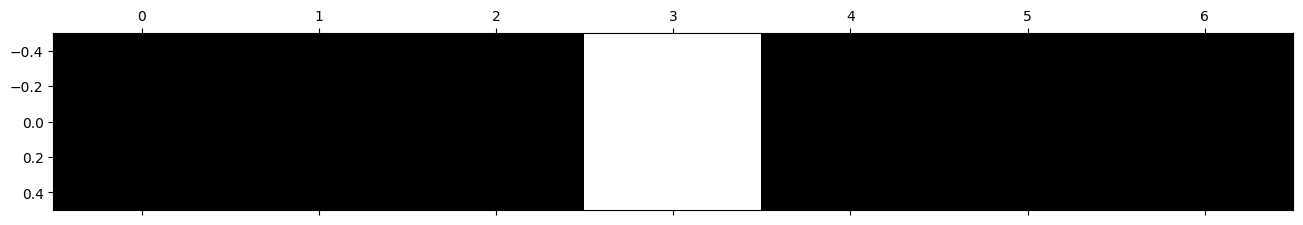

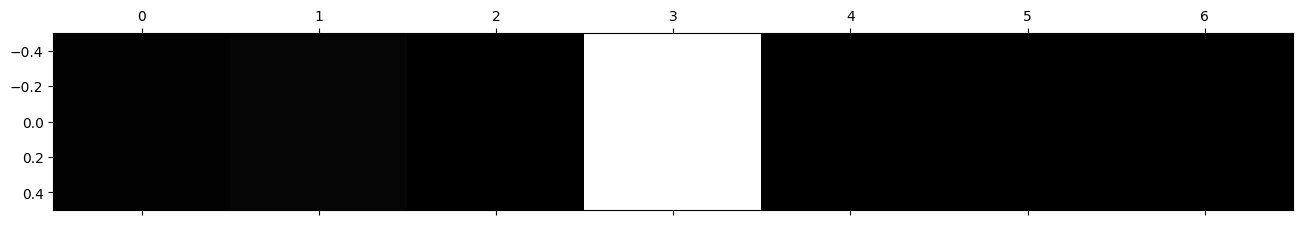

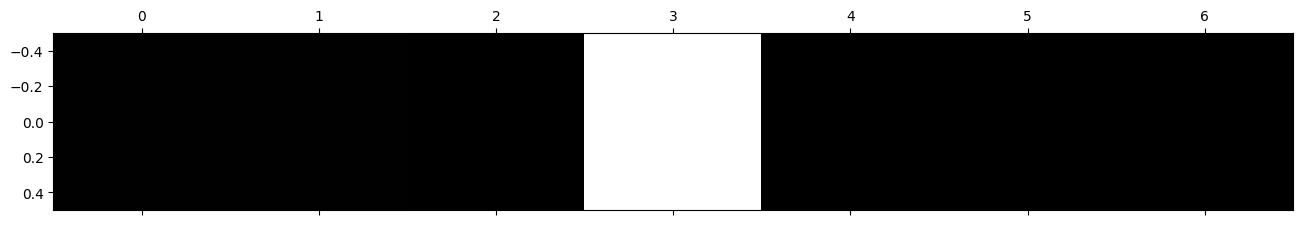

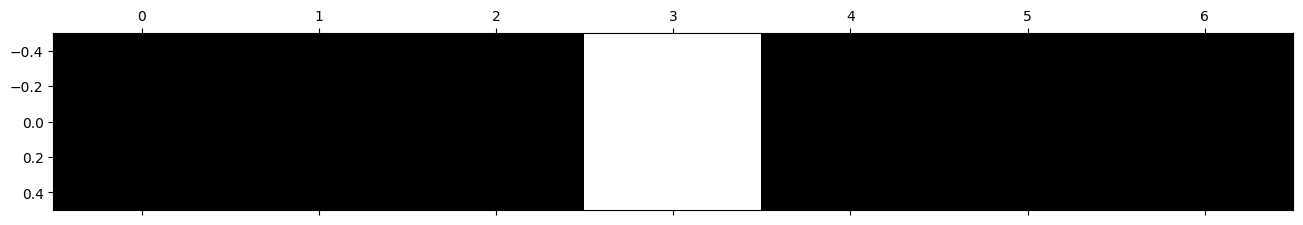

In [ ]:
for i in range(4):
    data = new_df.iloc[i].values.reshape(1, -1)  # Convert the row to a 2D array
    plt.matshow(data)
    plt.show()  # Show the plot for each iteration


In [ ]:
neww_df = pd.DataFrame(new_df)
neww_df.head()

,age,bmi,children,charges,smokerr,sexx,regionn
0,19,27.900,0,16884.92400,1,0,3
1,18,33.770,1,1725.55230,0,1,2
2,28,33.000,3,4449.46200,0,1,2
3,33,22.705,0,21984.47061,0,1,1
4,32,28.880,0,3866.85520,0,1,1


In [ ]:
y = neww_df.smokerr
y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smokerr, Length: 1337, dtype: int64

In [ ]:
x = neww_df.drop(['smokerr'], axis = 'columns')
x

,age,bmi,children,charges,sexx,regionn
0,19,27.900,0,16884.92400,0,3
1,18,33.770,1,1725.55230,1,2
2,28,33.000,3,4449.46200,1,2
3,33,22.705,0,21984.47061,1,1
4,32,28.880,0,3866.85520,1,1
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,2
1336,21,25.800,0,2007.94500,0,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(      age     bmi  children      charges  sexx  regionn
 896    43  20.045         2  19798.05455     0        0
 194    18  34.430         0   1137.46970     1        2
 240    23  36.670         2  38511.62830     0        0
 1257   54  27.645         1  11305.93455     0        1
 575    58  27.170         0  12222.89830     0        1
 ...   ...     ...       ...          ...   ...      ...
 764    45  25.175         2   9095.06825     0        0
 836    36  31.500         0   4402.23300     1        3
 1217   29  37.290         2   4058.11610     1        2
 559    19  35.530         0   1646.42970     1        1
 685    53  26.410         2  11244.37690     1        0
 
 [1069 rows x 6 columns],
       age     bmi  children      charges  sexx  regionn
 1248   18  39.820         0   1633.96180     0        2
 610    47  29.370         1   8547.69130     0        2
 393    49  31.350         1   9290.13950     1        0
 503    19  30.250         0  32548.34050     1        2
 19

In [ ]:
randommodel = RandomForestClassifier(n_estimators=10)
randommodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
randommodel.score(X_train, y_train)

0.9981290926099158

In [ ]:
y_predicted = randommodel.predict(X_test)

In [ ]:
con_mat = confusion_matrix(y_test, y_predicted)
con_mat

array([[200,  10],
       [ 10,  48]])

Text(95.72222222222221, 0.5, 'Truth')

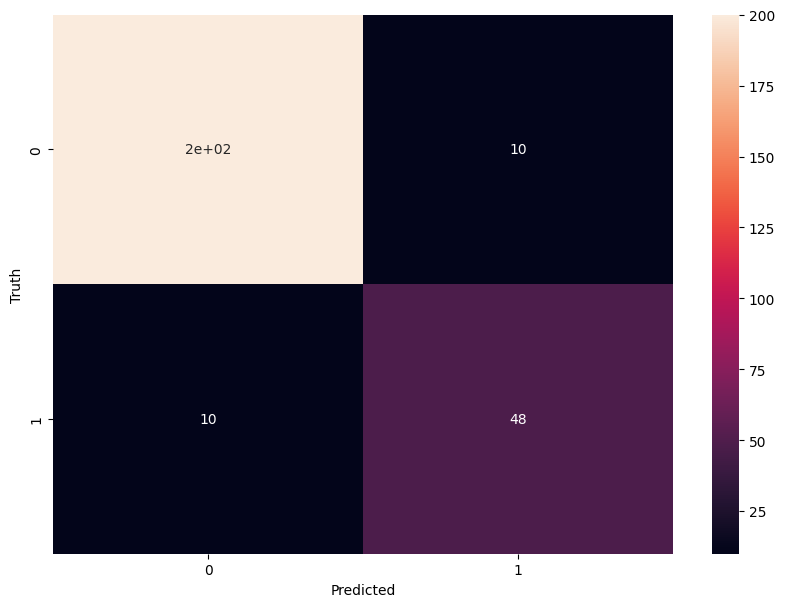

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(con_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **SVM**

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
classifers = [LogisticRegression(random_state = 42), SVC(random_state = 42),
             RandomForestClassifier(random_state = 42)]
model_names = ["Logistic Regression", "Support vector machine", "Random Forest"]

In [ ]:
def train_val_models (classifers, model_names, X_train, X_test, y_train, y_test):

    reports = []

    for clf, model in zip(classifers, model_names):
        clf.fit(X_train, y_train)
        y_pred = clf.predict (X_test)
        report = classification_report(y_test, y_pred)
        reports.append(report)

    return model_names, reports

In [ ]:
model_names, report = train_val_models(classifiers, model_names,X_train, X_test, y_train, y_test)

In [ ]:
for name, report in zip(model_names, report):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       210
           1       0.70      0.88      0.78        58

    accuracy                           0.89       268
   macro avg       0.83      0.89      0.85       268
weighted avg       0.91      0.89      0.90       268




Support vector machine
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       210
           1       0.84      0.91      0.88        58

    accuracy                           0.94       268
   macro avg       0.91      0.93      0.92       268
weighted avg       0.95      0.94      0.94       268




Random Forest
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       210
           1       0.88      0.84      0.86        58

    accuracy                           0.94       268
   macro avg       0.92      0.91      0.91       268
weighted av